# Simple JAX MLP

16th June - testing simple MLP written in JAX on ESOL

In [1]:
from playground.preprocessing import data_morgan, load_and_featurize_esol
from playground.models.jax_mlp_basic import train_model

df_esol = load_and_featurize_esol(subset=True)
esol_data = data_morgan(df_esol)
print(f'Number of datapoints: {len(df_esol)}')

INFO:rdkit:Enabling RDKit 2022.03.3 jupyter extensions


Number of datapoints: 100


Batch:   0%|          | 0/5000 [00:00<?, ?it/s]INFO:absl:Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
INFO:absl:Unable to initialize backend 'gpu': NOT_FOUND: Could not find registered platform with name: "cuda". Available platform names are: Interpreter Host
INFO:absl:Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
Batch: 100%|██████████| 5000/5000 [00:24<00:00, 202.22it/s]


[0.        1.5738695 0.        ... 0.        0.        0.       ]
[-0.02023738  0.17219016  0.         ...  0.          0.
  0.        ]
[0.        1.3937525 0.        ... 0.        0.        0.       ]
[0.       1.202379 0.       ... 0.       0.       0.      ]
[0.         0.10455364 0.         ... 0.         0.         0.        ]
[-0.10993361  0.864009    0.         ...  0.          0.
  0.        ]
[-0.11638693  0.00722793  0.         ...  0.          0.
  0.        ]
[ 0.        -0.5876346  0.        ...  0.         0.         0.       ]
[0.         0.90792745 0.         ... 0.         0.         0.        ]
[0.         0.55849797 0.         ... 0.         0.         0.        ]
[0.        1.8375002 0.        ... 0.        0.        0.       ]
[-0.10354217 -0.07035741  0.         ...  0.          0.
  0.        ]
[0.         0.07462218 0.         ... 0.         0.         0.        ]
[-0.06114176 -0.2944288   0.         ...  0.          0.
  0.        ]
[ 0.         -0.45088625  0

R2: 1.0000
MSE: 0.0000


R2: -0.0401
MSE: 17.8382


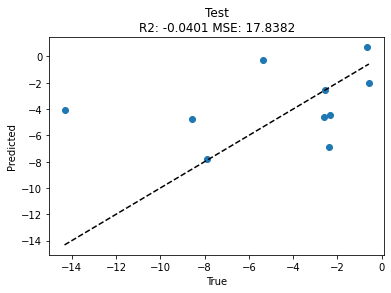

In [2]:
from playground.utils import plot_training_curve, plot_correlation
from playground.models.jax_mlp_basic import eval_model

training_loss, test_loss, params = train_model(esol_data, steps=5000, lr=5e-2)
W, b = params

plot_training_curve(training_loss, test_loss)
plot_correlation(eval_model(W, b, esol_data.train_x), esol_data.train_y)
plot_correlation(eval_model(W, b, esol_data.test_x), esol_data.test_y, title='Test')